In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

--2024-10-07 16:04:14--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [   <=>              ] 999.85K  2.14MB/s    in 0.5s    

2024-10-07 16:04:15 (2.14 MB/s) - ‘bank+marketing.zip’ saved [1023843]



In [4]:
!unzip bank+marketing.zip

Archive:  bank+marketing.zip
 extracting: bank.zip                
 extracting: bank-additional.zip     


In [5]:
!unzip bank.zip

Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [2]:
df = pd.read_csv('data/bank-full.csv', sep=';')

In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Features

For the rest of the homework, you'll need to use only these columns:

* `age`,
* `job`,
* `marital`,
* `education`,
* `balance`,
* `housing`,
* `contact`,
* `day`,
* `month`,
* `duration`,
* `campaign`,
* `pdays`,
* `previous`,
* `poutcome`,
* `y`

### Data preparation

* Select only the features from above.
* Check if the missing values are presented in the features.

In [5]:
cols = ['age', 'job', 'marital', 'education', 'balance', 'housing',
        'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
df = df[cols]

In [ ]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Question 1

What is the most frequent observation (mode) for the column `education`?

- `unknown`
- `primary`
- **`secondary`**
- `tertiary`

In [10]:
df.education.mode()

0    secondary
Name: education, dtype: object

In [ ]:
df.groupby(by='education')['education'].count().sort_values(ascending=False)

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `age` and `balance`
- `day` and `campaign`
- `day` and `pdays`
- **`pdays` and `previous`**

In [12]:
corr = df.corr(numeric_only=True)

In [13]:
corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


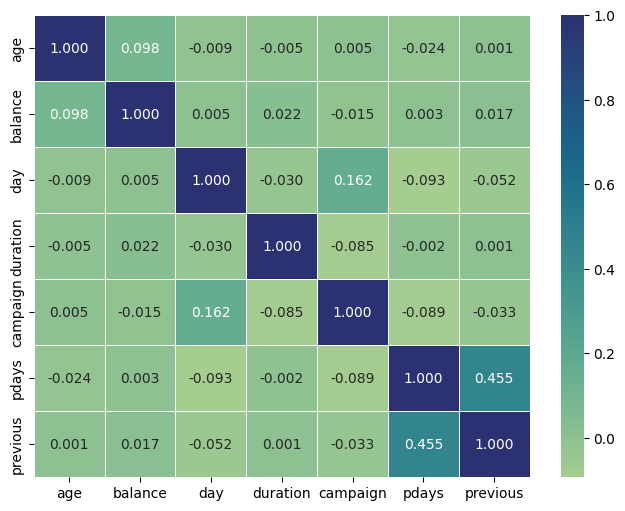

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, linewidths=0.5, cmap="crest", fmt=".3f");

In [ ]:
corr.unstack().sort_values(ascending=False)[7:13]

pdays     previous    0.454820
previous  pdays       0.454820
day       campaign    0.162490
campaign  day         0.162490
balance   age         0.097783
age       balance     0.097783
dtype: float64

### Target encoding

* Now we want to encode the `y` variable.
* Let's replace the values `yes`/`no` with `1`/`0`.

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.

In [16]:
df.y.replace({'yes': 1, 'no': 0}, inplace=True)

/tmp/ipykernel_2992/222367694.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.y.replace({'yes': 1, 'no': 0}, inplace=True)
/tmp/ipykernel_2992/222367694.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.y.replace({'yes': 1, 'no': 0}, inplace=True)


In [17]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df.iloc[ : , : -1]
y = df.y

In [20]:
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=.20 ,random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=42)

In [21]:
X_train.shape, X_val.shape, X_test.shape

((27126, 14), (9042, 14), (9043, 14))

### Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
  
- `contact`
- `education`
- `housing`
- **`poutcome`**

In [22]:
from sklearn.metrics import mutual_info_score

In [23]:
cat_cols = X_train.describe(exclude='number').columns

In [24]:
# Function for mutual informatin score
def calculate_mi(series):
    return mutual_info_score(series, y_train)

In [25]:
df_mi = X_train[cat_cols].apply(calculate_mi)

In [26]:
df_mi.sort_values(ascending=False)

poutcome     0.029533
month        0.025090
contact      0.013356
housing      0.010343
job          0.007316
education    0.002697
marital      0.002050
dtype: float64

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.6
- 0.7
- 0.8
- **0.9**

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

In [29]:
dv = DictVectorizer(sparse=False)

In [30]:
train_dict = X_train.to_dict(orient='records')

X_train_dv = dv.fit_transform(train_dict)

In [31]:
val_dict = X_val.to_dict(orient='records')

X_val_dv = dv.transform(val_dict)

In [32]:
lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

In [33]:
lr.fit(X_train_dv, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [34]:
y_pred = lr.predict_proba(X_val_dv)[:, 1]

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
org_accuracy = accuracy_score(y_val, (y_pred > 0.5).astype(int))
org_accuracy

0.9009068790090687

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `age`
- `balance`
- `marital`
- `previous`

> **Note**: The difference doesn't have to be positive.

In [37]:
all_cols = list(X_train.columns)

In [38]:
res = []

for col in all_cols:
    features =  all_cols.copy()
    features.remove(col)

    dv = DictVectorizer(sparse=False)

    train_dict = X_train[features].to_dict(orient='records')
    X_train_dv = dv.fit_transform(train_dict)

    val_dict = X_val[features].to_dict(orient='records')
    X_val_dv = dv.transform(val_dict)

    lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    lr.fit(X_train_dv, y_train)

    y_pred = lr.predict_proba(X_val_dv)[:, 1]

    score = accuracy_score(y_val, (y_pred > 0.5).astype(int))

    res.append((col, org_accuracy, org_accuracy-score, score))


In [39]:
df_score = pd.DataFrame(res, columns=['col_name', 'org_accuracy', 'diff', 'score'])
df_score

,col_name,org_accuracy,diff,score
0,age,0.900907,-0.000442,0.901349
1,job,0.900907,-0.000221,0.901128
2,marital,0.900907,0.000000,0.900907
3,education,0.900907,0.000000,0.900907
4,balance,0.900907,-0.000111,0.901017
5,housing,0.900907,-0.000221,0.901128
6,contact,0.900907,0.000442,0.900464
7,day,0.900907,-0.000442,0.901349
8,month,0.900907,0.001106,0.899801
9,duration,0.900907,0.011170,0.889737


### Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0, 0.01, 0.1, 1, 10]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- 0.1
- 1
- 10
- 100

In [45]:
reg_list = []

for num in [0.01, 0.1, 1, 10, 100]:
    dv = DictVectorizer(sparse=False)

    train_dict = X_train.to_dict(orient='records')
    X_train_dv = dv.fit_transform(train_dict)

    val_dict = X_val.to_dict(orient='records')
    X_val_dv = dv.transform(val_dict)

    lr = LogisticRegression(solver='liblinear', C=num, max_iter=1000, random_state=42)
    lr.fit(X_train_dv, y_train)

    y_pred = lr.predict_proba(X_val_dv)[:, 1]

    score = accuracy_score(y_val, (y_pred > 0.5).astype(int))

    reg_list.append((num, score))

In [46]:
df_reg = pd.DataFrame(reg_list, columns=['C', 'score'])

In [47]:
df_reg

,C,score
0,0.01,0.897921
1,0.10,0.900796
2,1.00,0.900907
3,10.00,0.900907
4,100.00,0.900686
